 ## 2. Magnitudes as a Geometric Measure

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sympy import (
    Eq,
    Integers,
    Mod,
    pi,
    plot,
    Point,
    Rationals,
    Ray,
    Reals,
    RegularPolygon,
    Segment,
    solve,
    symbols,
    Symbol
)

 > Many comparisons or measurements of various magnitudes can be reduced to the single scale provided by the real numbers. And in those cases where a single real number does not suffice to measure a magnitude, it is often fitting to use several such numbers - as when the size of a plane figure is given by its width and its height, or of a solid figure by width, height, and depth.

In [2]:
Rationals.is_proper_superset(Integers)

True

In [3]:
Reals.is_proper_superset(Rationals)

True

In [4]:
Rationals.complement(Reals)

Complement(Reals, Rationals)

In [5]:
pA = Point(0, 0.1)
pB = Point(1, 0.1)
sAB = Segment(pA, pB)

pC = Point(0, 1)
pD = Point(0, 2)
sCD = Segment(pC, pD)

sAB.length == sCD.length

True

In [6]:
pR = Point(0, 0)
pS = Point(pi, 0)
rRS = Segment(pR, pS)
rRS.length

pi

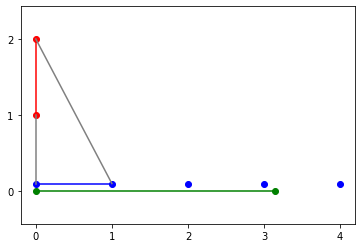

In [7]:
laid_off_AB = Point(2, .1), Point(3, .1), Point(4, .1)

fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.scatter(*list(zip(pR, pS)), c='g')
ax1.plot(*list(zip(pR, pS)), c='g')
ax1.scatter(*list(zip(pA, pB, *laid_off_AB)), c='b')
ax1.plot(*list(zip(pA, pB)), c='b')
ax1.scatter(*list(zip(pC, pD)), c='r')
ax1.plot(*list(zip(pC, pD)), c='r')
ax1.plot(*list(zip(pA, pC)), c='gray')
ax1.plot(*list(zip(pB, pD)), c='gray')
ax1.axis('equal')
ax1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax1.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

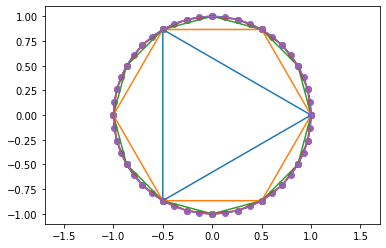

In [8]:
def add_poly(ax, poly):
    verts = poly.vertices
    verts.append(verts[0])
    verts= list(zip(*verts))
    ax.scatter(*verts)
    ax.plot(*verts)


p0 = Point(0, 0)
polys = [None, None, None]
for i in range(3, 50):
    polys.append(RegularPolygon(c=p0, r=1, n=i))

S1 = plt.Circle(xy=(0, 0), radius=1, fill=False, ec='k')

fig2 = plt.figure()
ax2 = fig2.subplots()
ax2.axis('equal')
ax2.set_xlim(-1.1, 1.1)
ax2.set_ylim(-1.1, 1.1)
ax2.add_patch(S1)
for i in [(2**x)*3 for x in range(0, 5)]:
    add_poly(ax2, polys[i])

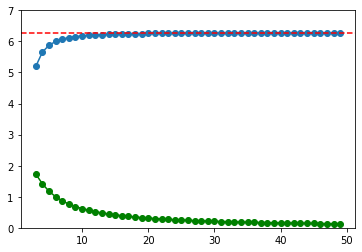

In [9]:
x1 = [len(p.sides) for p in polys if p is not None]
y1 = [p.length.evalf() for p in polys if p is not None]
y2 = [x * y for x, y in zip(x1, y1)]

fig3 = plt.figure()
ax3 = fig3.subplots()
ax3.scatter(x1, y2)
ax3.plot(x1, y2)
ax3.scatter(x1, y1, c='g')
ax3.plot(x1, y1, c='g')
ax3.set_ylim(0, 7)
ax3.axhline(y=2*pi, c='r', ls='--')

(0.0, 4.0)

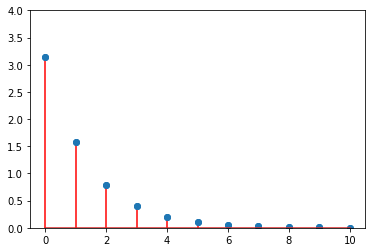

In [10]:
x3 = list(range(0, 11))
y3 = [pi/2**x for x in x3]

fig4 = plt.figure()
ax4 = fig4.subplots()
ax4.scatter(x3, y3)
ax4.stem(x3, y3, 'r')
ax4.set_ylim(0, 4)

In [11]:
def real_to_angle(r):
    """ Convert real number to angle on a circle. """
    if r < 0:
        return "Invalid real number"
    elif r < (2*pi).evalf():
        return {'t0': r, 'k': 0}

    t = Symbol('t', positive=True)
    k = Symbol('k', positive=True, integer=True)

    t0_exp = Mod(t, 2*pi)
    exp = Eq(t, t0_exp + (2*pi*k)).subs(t, r)

    result = {'t0': t0_exp.subs(t, r).evalf()}
    result.update(solve(exp, t0_exp, k)[0])

    return result


real_to_angle(7)

{'t0': 0.716814692820414, k: 1}

In [12]:
real_to_angle(19)

{'t0': 0.150444078461241, k: 3}

In [13]:
real_to_angle(1)

{'t0': 1, 'k': 0}

In [23]:
def wrapping_function(x):
    """ Periodically wrap positive real 'x' around a circle circumfrence. """
    return Mod(x, 2*pi)


t = symbols('t')
theta_t = wrapping_function(t)
theta_t

Mod(t, 2*pi)

In [24]:
t_plus = t + (2*pi)
theta_t_plus = wrapping_function(t_plus)
theta_t_plus

Mod(t, 2*pi)

In [25]:
Eq(theta_t_plus, theta_t)

True